In [1]:
#https://www.kaggle.com/function9/bidirectional-lstm-gan-music-generation
#https://www.kaggle.com/abhisheksinha28/bidirectional-lstm/data
#https://www.kaggle.com/sekfook97/gan-for-anomaly-detection
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Bidirectional, LSTM, Reshape, RepeatVector, TimeDistributed
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

import os

from PIL import Image

Using TensorFlow backend.


In [2]:
dtypes = {
"feature1": np.float16,
"feature2": np.float16,
"feature3": np.float16,
"feature4": np.float16,
"feature5": np.float16,
"feature6": np.float16,
"feature7": np.float16,
"feature8": np.float16,
"feature9": np.float16,
"feature10": np.float16,
"feature11": np.float16,
"feature12": np.float16,
"feature13": np.float16,
"feature14": np.float16,
"feature15": np.float16,
"feature16": np.float16,
"feature17": np.float16,
"feature18": np.float16,
"feature19": np.float16,
"feature20": np.float16,
"feature21": np.float16,
"feature22": np.float16,
"feature23": np.float16,
"feature24": np.float16,
"feature25": np.float16,    
"feature26": np.float16,
"feature27": np.float16,
"feature28": np.float16,
"feature29": np.float16,
"feature30": np.float16,    
"label": np.object}    
columns = ["feature1","feature2","feature3","feature4","feature5","feature6","feature7","feature8","feature9","feature10","feature11","feature12","feature13","feature14","feature15","feature16","feature17","feature18","feature19","feature20","feature21","feature22","feature23","feature24","feature25","feature26","feature27","feature28","feature29","feature30","label"]
#df = pd.read_csv("/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected", sep=",", names=columns, dtype=dtypes, index_col=None)
df = pd.read_csv(r"C:\Users\admin\SDN\afterdimensionalityreduction",sep=",", names=columns, dtype=str, index_col=None)
#df_read = pd.read_csv(savefile, dtype=str, index_col=0)
#print(type(train))

In [3]:
df.label.value_counts()

Abnormal    275465
Normal       68424
Name: label, dtype: int64

In [4]:
df.head

<bound method NDFrame.head of        feature1              feature2              feature3 feature4 feature5  \
0           0.0  0.006962014399999999            0.05562538      0.0      0.0   
1           0.0            0.05218774                   0.0      0.0      0.0   
2           0.0           0.048415996           0.014630627      0.0      0.0   
3           0.0                   0.0           0.038806356      0.0      0.0   
4           0.0            0.05172342            0.01308862      0.0      0.0   
...         ...                   ...                   ...      ...      ...   
343884      0.0            0.04297894           0.017960861      0.0      0.0   
343885      0.0            0.04324762           0.014465368      0.0      0.0   
343886      0.0           0.047583852                   0.0      0.0      0.0   
343887      0.0            0.04297537  0.017960499999999997      0.0      0.0   
343888      0.0            0.04319027           0.014465845      0.0      0.0  

In [5]:
#0 for normal data and 1 for abnormalities
df.label=df.label.apply(lambda x: 0 if x == 'Normal' else 1)

In [6]:
df.shape

(343889, 31)

In [7]:
df.head

<bound method NDFrame.head of        feature1              feature2              feature3 feature4 feature5  \
0           0.0  0.006962014399999999            0.05562538      0.0      0.0   
1           0.0            0.05218774                   0.0      0.0      0.0   
2           0.0           0.048415996           0.014630627      0.0      0.0   
3           0.0                   0.0           0.038806356      0.0      0.0   
4           0.0            0.05172342            0.01308862      0.0      0.0   
...         ...                   ...                   ...      ...      ...   
343884      0.0            0.04297894           0.017960861      0.0      0.0   
343885      0.0            0.04324762           0.014465368      0.0      0.0   
343886      0.0           0.047583852                   0.0      0.0      0.0   
343887      0.0            0.04297537  0.017960499999999997      0.0      0.0   
343888      0.0            0.04319027           0.014465845      0.0      0.0  

In [8]:
df = pd.DataFrame(df)   
 
df.dtypes

feature1     object
feature2     object
feature3     object
feature4     object
feature5     object
feature6     object
feature7     object
feature8     object
feature9     object
feature10    object
feature11    object
feature12    object
feature13    object
feature14    object
feature15    object
feature16    object
feature17    object
feature18    object
feature19    object
feature20    object
feature21    object
feature22    object
feature23    object
feature24    object
feature25    object
feature26    object
feature27    object
feature28    object
feature29    object
feature30    object
label         int64
dtype: object

In [9]:
df['feature1'] = df['feature1'].astype(float) 
df['feature2'] = df['feature2'].astype(float) 
df['feature3'] = df['feature3'].astype(float) 
df['feature4'] = df['feature4'].astype(float) 
df['feature5'] = df['feature5'].astype(float) 
df['feature6'] = df['feature6'].astype(float) 
df['feature7'] = df['feature7'].astype(float) 
df['feature8'] = df['feature8'].astype(float) 
df['feature9'] = df['feature9'].astype(float) 
df['feature10'] = df['feature10'].astype(float) 
df['feature11'] = df['feature11'].astype(float) 
df['feature12'] = df['feature12'].astype(float) 
df['feature13'] = df['feature13'].astype(float) 
df['feature14'] = df['feature14'].astype(float) 
df['feature15'] = df['feature15'].astype(float) 
df['feature16'] = df['feature16'].astype(float) 
df['feature17'] = df['feature17'].astype(float) 
df['feature18'] = df['feature18'].astype(float) 
df['feature19'] = df['feature19'].astype(float) 
df['feature20'] = df['feature20'].astype(float) 
df['feature21'] = df['feature21'].astype(float) 
df['feature22'] = df['feature22'].astype(float) 
df['feature23'] = df['feature23'].astype(float) 
df['feature24'] = df['feature24'].astype(float) 
df['feature25'] = df['feature25'].astype(float) 
df['feature26'] = df['feature26'].astype(float) 
df['feature27'] = df['feature27'].astype(float) 
df['feature28'] = df['feature28'].astype(float)
df['feature29'] = df['feature29'].astype(float) 
df['feature30'] = df['feature30'].astype(float) 

In [10]:
df1 = pd.DataFrame(df) 

In [11]:
#randomly sample 500 data point for training
df_train=df[df.label==1].sample(275465)

In [12]:
df_train.shape

(275465, 31)

In [13]:
df_train.dtypes

feature1     float64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
label          int64
dtype: object

In [14]:
#remove the item sampled from our dataset
index_list=df_train.index
df=df.drop(index_list)

In [15]:
df_train.iloc[1]

feature1     0.000000
feature2     0.000000
feature3     0.028014
feature4     0.000000
feature5     0.000000
feature6     0.015670
feature7     0.000000
feature8     0.000000
feature9     0.000000
feature10    0.000000
feature11    0.000000
feature12    0.000000
feature13    0.000000
feature14    0.016695
feature15    0.033749
feature16    0.000000
feature17    0.000000
feature18    0.051203
feature19    0.052126
feature20    0.000000
feature21    0.000000
feature22    0.000000
feature23    0.000000
feature24    0.000000
feature25    0.000000
feature26    0.000000
feature27    0.000000
feature28    0.013512
feature29    0.000000
feature30    0.012734
label        1.000000
Name: 134425, dtype: float64

In [16]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,label
0,0.0,0.006962,0.055625,0.0,0.0,0.0,0.036116,0.0,0.0,0.0,...,0.0,0.000000,0.000318,0.0,0.0,0.0,0.021632,0.0,0.000000,0
1,0.0,0.052188,0.000000,0.0,0.0,0.0,0.047845,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.057461,0.0,0.000000,0
2,0.0,0.048416,0.014631,0.0,0.0,0.0,0.045899,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.059599,0.0,0.000000,0
3,0.0,0.000000,0.038806,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.027111,0.000000,0.0,0.0,0.0,0.044531,0.0,0.013936,0
4,0.0,0.051723,0.013089,0.0,0.0,0.0,0.047847,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060423,0.0,0.000000,0


In [17]:
#drop the label columns
df_label=df_train.label
df_train=df_train.drop('label',axis=1)

In [18]:
df_label
df_label.to_csv('abnormallabel.csv', index=False)

In [19]:
df_train.shape

(275465, 30)

In [20]:
df_train.iloc[1]

feature1     0.000000
feature2     0.000000
feature3     0.028014
feature4     0.000000
feature5     0.000000
feature6     0.015670
feature7     0.000000
feature8     0.000000
feature9     0.000000
feature10    0.000000
feature11    0.000000
feature12    0.000000
feature13    0.000000
feature14    0.016695
feature15    0.033749
feature16    0.000000
feature17    0.000000
feature18    0.051203
feature19    0.052126
feature20    0.000000
feature21    0.000000
feature22    0.000000
feature23    0.000000
feature24    0.000000
feature25    0.000000
feature26    0.000000
feature27    0.000000
feature28    0.013512
feature29    0.000000
feature30    0.012734
Name: 134425, dtype: float64

In [21]:
df_train.shape

(275465, 30)

In [22]:
df_train=df_train.values.reshape((df_train.shape[0], 1, df_train.shape[1]))

In [23]:
df_train.shape

(275465, 1, 30)

In [24]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,label
0,0.0,0.006962,0.055625,0.0,0.0,0.0,0.036116,0.0,0.0,0.0,...,0.0,0.000000,0.000318,0.0,0.0,0.0,0.021632,0.0,0.000000,0
1,0.0,0.052188,0.000000,0.0,0.0,0.0,0.047845,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.057461,0.0,0.000000,0
2,0.0,0.048416,0.014631,0.0,0.0,0.0,0.045899,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.059599,0.0,0.000000,0
3,0.0,0.000000,0.038806,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.027111,0.000000,0.0,0.0,0.0,0.044531,0.0,0.013936,0
4,0.0,0.051723,0.013089,0.0,0.0,0.0,0.047847,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060423,0.0,0.000000,0


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras import optimizers
from keras.utils import plot_model
timesteps =  df_train.shape[1] # equal to the lookback
n_features =  df_train.shape[2] # 59

epochs = 15
batch = 64
lr = 0.0001

In [26]:
history=dict()
history['gen']=[]
history['dis']=[]

In [27]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error
                             ,mean_absolute_error)
from sklearn import metrics

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:
class LSTMGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 1
        self.img_cols = 30
        self.img_shape = (self.img_rows, self.img_cols)
        self.latent_dim = 30

        optimizer = Adam(0.0001, 0.4)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates song
        z = Input(shape=(1,30))
    
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()
        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, 30)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128)))
        model.add(LeakyReLU(alpha=0.2))
        #specifying output to have 40 timesteps
        model.add(RepeatVector(30))
        #specifying 1 feature as the output
        
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))   
        model.add(TimeDistributed(Dense(128)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(128)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(1)))
        model.add(LeakyReLU(alpha=0.2))
        model.summary()

        noise = Input(shape=(1,30))
        img = model(noise)

        return Model(noise, img)
        #return Model(img)
    

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(64, use_bias=False, input_shape=(30, 1)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Convolution1D(32, 3, strides=2, padding='same', use_bias=False))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Convolution1D(1, 3, strides=2, padding='same', use_bias=False))
        model.add(Flatten())        
        model.add(RepeatVector(1))        
        model.add(TimeDistributed(Dense(32, activation = 'relu')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(1, activation = 'relu')))
        #model.add(TimeDistributed(Dense(1)))
        #model.add(Dense(1, activation='tanh'))
        #model.add(Dense(1))
        #model.add(Activation('sigmoid'))
        model.summary()
        #model.add(layers.BatchNormalization())
        #model.add(sigmoid())
       
        img = Input(shape=(30,1))
        validity = model(img)
        print("exit")
        return Model(img, validity)

    def train(self, epochs=15, batch_size=64, save_interval=50):
        print("enter")  
        # Load the dataset
        X_train = df_train
       
        # Rescale 0 to 1
      #  X_train = X_train / 128

        # Adversarial ground truths
        valid = np.ones((batch_size,1,1))
        fake = np.zeros((batch_size,1,1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of songs
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            imgs = np.array(imgs)
            imgs = imgs.reshape(len(imgs),30,1)

            # Sample noise and generate a batch of new songs
            noise = np.random.normal(0, 1, (batch_size,1,30))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake songs as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            history['gen'].append(g_loss)
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            history['dis'].append(d_loss) 
            #return (g_loss,d_loss)
            # If at save interval => save model
#            if epoch % save_interval == 0:
 #               self.generator.save("LSTM_generator.h5")


In [29]:
lstmgan = LSTMGAN()
#lstmgan.train(epochs=1000, batch_size=20, save_interval=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30, 64)            64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 32)            6144      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 15, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 1)              96        
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                

In [30]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

In [31]:
lstmgan.train(epochs=1000, batch_size=20, save_interval=100)

enter


C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 6.101748, acc.: 50.00%] [G loss: 7.514967]


C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 5.132453, acc.: 50.00%] [G loss: 6.740389]
2 [D loss: 4.910282, acc.: 50.00%] [G loss: 6.310653]
3 [D loss: 4.745870, acc.: 50.00%] [G loss: 6.013654]
4 [D loss: 4.046610, acc.: 50.00%] [G loss: 5.735656]
5 [D loss: 2.950385, acc.: 50.00%] [G loss: 5.653929]
6 [D loss: 2.887361, acc.: 50.00%] [G loss: 5.367849]
7 [D loss: 2.903033, acc.: 50.00%] [G loss: 5.507888]
8 [D loss: 3.119380, acc.: 50.00%] [G loss: 5.201163]
9 [D loss: 3.097181, acc.: 50.00%] [G loss: 5.288337]
10 [D loss: 3.047255, acc.: 50.00%] [G loss: 5.212106]
11 [D loss: 2.716779, acc.: 50.00%] [G loss: 5.229543]
12 [D loss: 2.709215, acc.: 50.00%] [G loss: 5.125268]
13 [D loss: 2.668502, acc.: 50.00%] [G loss: 4.935365]
14 [D loss: 2.585671, acc.: 50.00%] [G loss: 4.929595]
15 [D loss: 2.655252, acc.: 50.00%] [G loss: 4.966196]
16 [D loss: 2.585852, acc.: 50.00%] [G loss: 5.004762]
17 [D loss: 2.670637, acc.: 50.00%] [G loss: 4.934727]
18 [D loss: 2.527434, acc.: 50.00%] [G loss: 4.886664]
19 [D loss: 2.47861

150 [D loss: 1.735262, acc.: 50.00%] [G loss: 7.624818]
151 [D loss: 1.749480, acc.: 50.00%] [G loss: 8.775644]
152 [D loss: 1.734798, acc.: 50.00%] [G loss: 7.827512]
153 [D loss: 1.750500, acc.: 50.00%] [G loss: 8.997293]
154 [D loss: 1.752293, acc.: 50.00%] [G loss: 9.561164]
155 [D loss: 1.780751, acc.: 50.00%] [G loss: 9.917506]
156 [D loss: 1.711393, acc.: 50.00%] [G loss: 5.272920]
157 [D loss: 1.772405, acc.: 50.00%] [G loss: 7.210542]
158 [D loss: 1.703607, acc.: 50.00%] [G loss: 6.762200]
159 [D loss: 1.702731, acc.: 50.00%] [G loss: 5.880547]
160 [D loss: 1.723889, acc.: 50.00%] [G loss: 7.463267]
161 [D loss: 1.694720, acc.: 50.00%] [G loss: 7.343556]
162 [D loss: 1.741537, acc.: 50.00%] [G loss: 10.002405]
163 [D loss: 1.701667, acc.: 50.00%] [G loss: 7.512979]
164 [D loss: 1.696527, acc.: 50.00%] [G loss: 7.023363]
165 [D loss: 1.746940, acc.: 50.00%] [G loss: 7.678383]
166 [D loss: 1.685922, acc.: 50.00%] [G loss: 8.758777]
167 [D loss: 1.657389, acc.: 50.00%] [G loss: 6

297 [D loss: 1.454435, acc.: 50.00%] [G loss: 2.782886]
298 [D loss: 1.455850, acc.: 50.00%] [G loss: 2.801986]
299 [D loss: 1.475430, acc.: 50.00%] [G loss: 2.945810]
300 [D loss: 1.449221, acc.: 50.00%] [G loss: 2.882969]
301 [D loss: 1.420448, acc.: 50.00%] [G loss: 2.786689]
302 [D loss: 1.458453, acc.: 50.00%] [G loss: 2.622108]
303 [D loss: 1.479187, acc.: 50.00%] [G loss: 3.477879]
304 [D loss: 1.470952, acc.: 50.00%] [G loss: 3.408309]
305 [D loss: 1.456607, acc.: 50.00%] [G loss: 2.795179]
306 [D loss: 1.463131, acc.: 50.00%] [G loss: 2.934780]
307 [D loss: 1.425228, acc.: 50.00%] [G loss: 2.813641]
308 [D loss: 1.464312, acc.: 50.00%] [G loss: 2.738955]
309 [D loss: 1.443177, acc.: 50.00%] [G loss: 2.879166]
310 [D loss: 1.434201, acc.: 50.00%] [G loss: 3.436242]
311 [D loss: 1.433874, acc.: 50.00%] [G loss: 2.955583]
312 [D loss: 1.422921, acc.: 50.00%] [G loss: 2.826053]
313 [D loss: 1.459755, acc.: 50.00%] [G loss: 2.739660]
314 [D loss: 1.414135, acc.: 50.00%] [G loss: 2.

444 [D loss: 1.236346, acc.: 50.00%] [G loss: 2.483456]
445 [D loss: 1.257088, acc.: 50.00%] [G loss: 2.450534]
446 [D loss: 1.320565, acc.: 50.00%] [G loss: 2.522973]
447 [D loss: 1.301645, acc.: 50.00%] [G loss: 2.489039]
448 [D loss: 1.236365, acc.: 50.00%] [G loss: 2.515432]
449 [D loss: 1.310158, acc.: 50.00%] [G loss: 2.585560]
450 [D loss: 1.298217, acc.: 50.00%] [G loss: 2.492786]
451 [D loss: 1.256022, acc.: 50.00%] [G loss: 2.481633]
452 [D loss: 1.273717, acc.: 50.00%] [G loss: 2.503231]
453 [D loss: 1.237851, acc.: 50.00%] [G loss: 2.306347]
454 [D loss: 1.286718, acc.: 50.00%] [G loss: 2.556925]
455 [D loss: 1.232192, acc.: 50.00%] [G loss: 2.586794]
456 [D loss: 1.268362, acc.: 50.00%] [G loss: 2.423305]
457 [D loss: 1.291200, acc.: 50.00%] [G loss: 2.424138]
458 [D loss: 1.263758, acc.: 50.00%] [G loss: 2.471231]
459 [D loss: 1.298960, acc.: 50.00%] [G loss: 2.358971]
460 [D loss: 1.252558, acc.: 50.00%] [G loss: 2.330488]
461 [D loss: 1.311602, acc.: 50.00%] [G loss: 2.

591 [D loss: 1.157812, acc.: 50.00%] [G loss: 2.246437]
592 [D loss: 1.211756, acc.: 50.00%] [G loss: 2.277275]
593 [D loss: 1.157715, acc.: 50.00%] [G loss: 2.228818]
594 [D loss: 1.166079, acc.: 50.00%] [G loss: 2.135110]
595 [D loss: 1.181915, acc.: 50.00%] [G loss: 2.205032]
596 [D loss: 1.131316, acc.: 50.00%] [G loss: 2.261668]
597 [D loss: 1.188215, acc.: 50.00%] [G loss: 2.165972]
598 [D loss: 1.156024, acc.: 50.00%] [G loss: 2.147977]
599 [D loss: 1.156897, acc.: 50.00%] [G loss: 2.301651]
600 [D loss: 1.151695, acc.: 50.00%] [G loss: 2.224119]
601 [D loss: 1.121103, acc.: 50.00%] [G loss: 2.197582]
602 [D loss: 1.119603, acc.: 50.00%] [G loss: 1.992325]
603 [D loss: 1.216587, acc.: 50.00%] [G loss: 2.075628]
604 [D loss: 1.155265, acc.: 50.00%] [G loss: 2.122125]
605 [D loss: 1.138401, acc.: 50.00%] [G loss: 2.102549]
606 [D loss: 1.128001, acc.: 50.00%] [G loss: 2.181101]
607 [D loss: 1.110466, acc.: 50.00%] [G loss: 2.138766]
608 [D loss: 1.114255, acc.: 50.00%] [G loss: 2.

738 [D loss: 1.114393, acc.: 50.00%] [G loss: 1.977756]
739 [D loss: 1.058720, acc.: 50.00%] [G loss: 2.028972]
740 [D loss: 1.046037, acc.: 50.00%] [G loss: 1.864431]
741 [D loss: 1.041017, acc.: 50.00%] [G loss: 2.055896]
742 [D loss: 1.080278, acc.: 50.00%] [G loss: 2.046293]
743 [D loss: 1.082512, acc.: 50.00%] [G loss: 1.945320]
744 [D loss: 1.077734, acc.: 50.00%] [G loss: 1.951711]
745 [D loss: 1.073427, acc.: 50.00%] [G loss: 1.937019]
746 [D loss: 1.070985, acc.: 50.00%] [G loss: 1.951421]
747 [D loss: 1.052947, acc.: 50.00%] [G loss: 2.013065]
748 [D loss: 1.048823, acc.: 50.00%] [G loss: 2.083098]
749 [D loss: 1.124036, acc.: 50.00%] [G loss: 1.984745]
750 [D loss: 1.043216, acc.: 50.00%] [G loss: 2.147992]
751 [D loss: 1.008830, acc.: 50.00%] [G loss: 2.035893]
752 [D loss: 1.046096, acc.: 50.00%] [G loss: 2.007818]
753 [D loss: 1.071433, acc.: 50.00%] [G loss: 1.832910]
754 [D loss: 1.059043, acc.: 50.00%] [G loss: 2.013340]
755 [D loss: 1.065100, acc.: 50.00%] [G loss: 2.

885 [D loss: 0.974805, acc.: 50.00%] [G loss: 1.858271]
886 [D loss: 1.043130, acc.: 50.00%] [G loss: 1.883716]
887 [D loss: 0.947986, acc.: 50.00%] [G loss: 1.874329]
888 [D loss: 1.007625, acc.: 50.00%] [G loss: 1.861916]
889 [D loss: 0.962049, acc.: 50.00%] [G loss: 1.783398]
890 [D loss: 0.992775, acc.: 50.00%] [G loss: 1.862859]
891 [D loss: 1.011950, acc.: 50.00%] [G loss: 1.776298]
892 [D loss: 1.035751, acc.: 50.00%] [G loss: 1.757991]
893 [D loss: 0.969102, acc.: 50.00%] [G loss: 1.682660]
894 [D loss: 0.987290, acc.: 50.00%] [G loss: 1.744010]
895 [D loss: 0.973401, acc.: 50.00%] [G loss: 1.860072]
896 [D loss: 1.001217, acc.: 50.00%] [G loss: 1.890404]
897 [D loss: 0.936121, acc.: 50.00%] [G loss: 1.764523]
898 [D loss: 1.011581, acc.: 50.00%] [G loss: 1.702995]
899 [D loss: 1.007098, acc.: 50.00%] [G loss: 1.721196]
900 [D loss: 0.962941, acc.: 50.00%] [G loss: 1.796669]
901 [D loss: 0.900580, acc.: 50.00%] [G loss: 1.759636]
902 [D loss: 0.942268, acc.: 50.00%] [G loss: 1.

In [32]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 9m 4s


In [33]:
print(lstmgan.discriminator.layers[1].get_weights())

[array([[-2.78866738e-01,  2.83506215e-01, -1.06550917e-01,
         1.61859661e-01,  1.62954316e-01,  8.77741352e-02,
        -1.96943209e-01, -5.59760034e-02, -8.64504427e-02,
        -5.17245862e-05, -3.00759226e-01,  8.92397463e-02,
        -2.83573151e-01,  8.61801207e-02,  2.82437772e-01,
        -1.87183321e-01,  2.50819862e-01, -1.80072740e-01,
         2.58226752e-01,  2.65989065e-01, -1.39630333e-01,
         6.40792623e-02,  8.18407461e-02, -7.16285631e-02,
        -2.65613720e-02, -1.55572770e-02,  2.97948048e-02,
        -2.55733550e-01, -1.64589018e-01, -1.69833109e-01,
        -2.20689863e-01,  4.57774699e-02, -2.78150678e-01,
         5.65863140e-02,  1.20947488e-01, -2.97073096e-01,
        -2.95010597e-01, -6.73216507e-02, -1.16186395e-01,
        -1.68868214e-01, -2.76158959e-01,  2.67015785e-01,
         1.84346125e-01, -2.45254993e-01,  1.00093924e-01,
         3.43628898e-02,  3.24788690e-02,  1.27949685e-01,
        -2.27176771e-01, -2.81905830e-01, -1.37723356e-

In [34]:
import numpy as np
import keras
hidden_layers = keras.backend.function(
[lstmgan.discriminator.layers[0].input],  # we will feed the function with the input of the first layer  
[lstmgan.discriminator.layers[0].output,] # we want to get the output of the first layer
)
h=hidden_layers([df_train])
print(h)
print(np.shape(h))

[array([[[2.7087027e-02, 2.8347531e-02, 1.5393603e-02, ...,
         3.4542847e-02, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 2.8014038e-02, ...,
         1.3511876e-02, 0.0000000e+00, 1.2734290e-02]],

       [[0.0000000e+00, 4.1976795e-02, 1.6932707e-02, ...,
         2.2560477e-02, 0.0000000e+00, 0.0000000e+00]],

       ...,

       [[0.0000000e+00, 0.0000000e+00, 5.6570794e-02, ...,
         9.2335045e-05, 3.8696453e-05, 0.0000000e+00]],

       [[1.1414906e-02, 1.6699830e-02, 3.4302339e-02, ...,
         3.3625364e-03, 0.0000000e+00, 0.0000000e+00]],

       [[2.4491664e-02, 2.7264195e-02, 1.5420880e-02, ...,
         3.4583785e-02, 7.6724887e-03, 0.0000000e+00]]], dtype=float32)]
(1, 275465, 1, 30)


In [35]:
h=np.array(h)  

arr_reshaped = np.array(h).reshape(275465, 30) 

In [36]:
arr_reshaped.shape

(275465, 30)

In [37]:
df = pd.DataFrame(arr_reshaped)

In [38]:
df.to_csv('abnormal.csv', index=False)

In [39]:
#To check 1st row
print(h[:,1,:])

[[[0.         0.         0.02801404 0.         0.         0.01566972
   0.         0.         0.         0.         0.         0.
   0.         0.01669469 0.03374875 0.         0.         0.05120272
   0.05212622 0.         0.         0.         0.         0.
   0.         0.         0.         0.01351188 0.         0.01273429]]]


In [40]:
csv_1 = pd.read_csv('abnormal.csv')
csv_2 = pd.read_csv('abnormallabel.csv')

result = pd.concat([csv_1, csv_2], axis=1)

In [41]:
result.to_csv("lgcabnormalresult.csv", index=None, header=None)

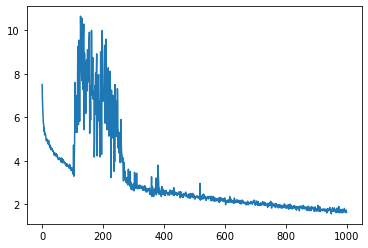

In [42]:
plt.plot(history['gen'])

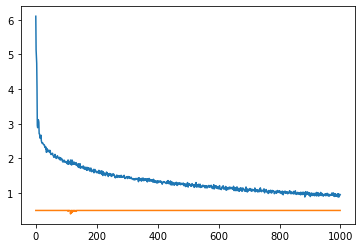

In [43]:
plt.plot(history['dis'])

In [44]:
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,label
0,0.0,0.006962,0.055625,0.0,0.0,0.0,0.036116,0.0,0.0,0.0,...,0.0,0.000000,0.000318,0.0,0.0,0.0,0.021632,0.0,0.000000,0
1,0.0,0.052188,0.000000,0.0,0.0,0.0,0.047845,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.057461,0.0,0.000000,0
2,0.0,0.048416,0.014631,0.0,0.0,0.0,0.045899,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.059599,0.0,0.000000,0
3,0.0,0.000000,0.038806,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.027111,0.000000,0.0,0.0,0.0,0.044531,0.0,0.013936,0
4,0.0,0.051723,0.013089,0.0,0.0,0.0,0.047847,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060423,0.0,0.000000,0


In [45]:

y_test=df1.label

x_test=df1.drop('label',axis=1).values.reshape(-1,30,1)


In [46]:
#y_pred=lstmgan.generator.predict(x_test)
y_pred=lstmgan.discriminator.predict(x_test)
print(y_pred)

[[[0.1866512 ]]

 [[0.19458453]]

 [[0.19500764]]

 ...

 [[0.19296129]]

 [[0.19483964]]

 [[0.19457051]]]


In [47]:
# predict probabilities for test set
yhat_probs = lstmgan.discriminator.predict(x_test, verbose=0)
yhat_classes=np.argmax(yhat_probs,axis=1)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(x_val, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [48]:
# Helper function that calculates the reconstruction loss of each data sample
def calculate_losses(x,preds):
    losses=np.zeros(len(x))
    for i in range(len(x)):
        losses[i]=((preds[i] - x[i]) ** 2).mean(axis=None)
        
    return losses

# We set the threshold equal to the training loss of the autoencoder
threshold=history.history["loss"][-1]

testing_set_predictions=lstmgan.discriminator.predict(x_test)
test_losses=calculate_losses(x_test,testing_set_predictions)
testing_set_predictions=np.zeros(len(test_losses))
testing_set_predictions[np.where(test_losses>threshold)]=1


error_df = pd.DataFrame({'Reconstruction_error': testing_set_predictions, 'True_class': y_test})
error_df.describe()

AttributeError: 'dict' object has no attribute 'history'

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_val,testing_set_predictions)
recall=recall_score(y_val,testing_set_predictions)
precision=precision_score(y_val,testing_set_predictions)
f1=f1_score(y_val,testing_set_predictions)
print("Performance over the testing data set \n")
print("Accuracy : {} , Recall : {} , Precision : {} , F1 : {}\n".format(accuracy,recall,precision,f1 ))

In [ ]:
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/#:~:text=Optimal%20Threshold%20for%20Precision%2DRecall%20Curve,-Unlike%20the%20ROC&text=Recall%20is%20calculated%20as%20the,positives%20and%20the%20false%20negatives.
#Optimal Threshold Tuning
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 

# predict probabilities
#yhat = model.predict_proba(x_val)
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [accuracy_score(y_test, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Accuracy-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [precision_score(y_test, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Precision-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [recall_score(y_test, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, recall-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
from sklearn.metrics import roc_auc_score
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

In [ ]:
maxlen=8
x_train = keras.preprocessing.sequence.pad_sequences(df_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
#x_test = keras.preprocessing.sequence.pad_sequences(x_test , maxlen=maxlen)

optimizer = keras.optimizers.Adam(lr=1e-3)
#https://www.kaggle.com/suicaokhoailang/10-fold-lstm-with-attention-0-991-lb
from sklearn.model_selection import KFold
from sklearn import metrics
import sklearn.metrics as sk
from sklearn.metrics import roc_curve,f1_score
from sklearn.metrics import auc
kf = KFold(n_splits=2, shuffle=True, random_state=42069)
preds = []
fold = 0
aucs = 0
for train_idx, val_idx in kf.split(x_train):
    x_train_f = x_train[train_idx]
    y_train_f = y_test[train_idx]
    x_val_f = x_train[val_idx]
    y_val_f = y_test[val_idx]
    lstmgan.discriminator.compile(optimizer, "binary_crossentropy", metrics=["accuracy"])
    #model = get_model()
    lstmgan.discriminator.fit(x_train_f, y_train_f,
              batch_size=256,
              epochs=10,
              verbose = 1,
              validation_data=(x_val_f, y_val_f))

    # Get accuracy of model on validation data. It's not AUC but it's something at least!
    preds_val = lstmgan.discriminator.predict([x_val_f], batch_size=512)
    preds.append(lstmgan.discriminator.predict(x_test))
    fold+=1
    fpr, tpr, thresholds = roc_curve(y_val_f, preds_val, pos_label=1)
    # calculate scores
    #lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
    aucs += auc(fpr,tpr)
    print('Fold {}, AUC = {}'.format(fold,auc(fpr, tpr)))
print("Cross Validation AUC = {}".format(aucs/10))
#print(sk.confusion_matrix(y_val_f,preds_val))


In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score

In [ ]:
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [ ]:
#looking for the optimal probability threshold
#prob=[0.5,0.55,0.6,0.65,0.75,0.8,0.85,0.9,0.95,1,2,2.5,5]
prob=[-0.2,-0.1,-0.05,0,0.005,0.1,0.157,0.2,0.3,0.5,1,1.5,2]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

In [ ]:
history=dict()
history['gen']=[]
history['dis']=[]
def train1(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= lstmgan.train(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [ ]:
loss, accuracy = lstmgan.discriminator.evaluate(x_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

In [ ]:
#y_pred = lstmgan.generator.predict_classes(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="binary")
precision = precision_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
#np.savetxt('results/expected1.txt', y_test, fmt='%01d')
#np.savetxt('results/predicted1.txt', y_pred, fmt='%01d')

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %accuracy)
print("racall")
print("%.6f" %recall)
print("precision")
print("%.6f" %precision)
print("f1score")
print("%.6f" %f1)
cm = metrics.confusion_matrix(y_test, y_pred)
print("==============================================")
print (cm)